# Lecture 8. Contour Analysis in OpenCV  
Detecting and Drawing Contours in OpenCV

### 1. What is Contour Deteciton?  
- Contour: 윤곽, 등고선  
- 윤곽은 (경계를 따라 난) 연속적인 모든 점들이 모인 곡선이며, 같은 색깔 또는 빛의 강도(intensity)를 가진다.  
- 윤곽은 모양 분석과 객체 검출 및 인식에 유용한 도구로 사용된다.
- open-cv 제공 모듈: `cv.findContours()`, `cv.drawContours()`
     - steps:
     - ① 이미지 읽기 및 Grayscale format으로 변환
     - ② Binary Thresholding 적용
     - ③ Contour 찾기
     - ④ 원본 RGB 이미지 위에 contours 그리기

contour shape: '(12, 1, 2)'
'detected' contours: '1' 


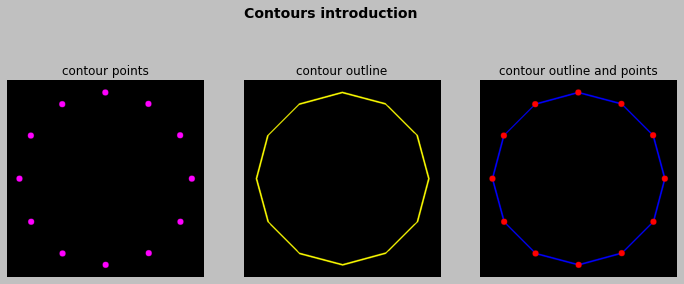

In [ ]:
# Import required packages:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def get_one_contour():
    """ Returns a 'fixed' contour. 
         """
    cnts = [np.array(
        [[[600, 320]], [[563, 460]], [[460, 562]], [[320, 600]], [[180, 563]], [[78, 460]], [[40, 320]], [[77, 180]],
         [[179, 78]], [[319, 40]], [[459, 77]], [[562, 179]]], dtype=np.int32)]
    return cnts


def array_to_tuple(arr):
    """Converts array to tuple"""
    return tuple(arr.reshape(1, -1)[0])


def draw_contour_points(img, cnts, color):
    """Draw all points from a list of contours"""
    for cnt in cnts:
        # print(cnt.shape)
        # print(cnt)
        squeeze = np.squeeze(cnt)
        # print(squeeze.shape)
        # print(squeeze)

        for p in squeeze:
            # print(p)
            p = array_to_tuple(p)
            # print(p)
            cv2.circle(img, p, 10, color, -1)

    return img


def draw_contour_outline(img, cnts, color, thickness=1):
    """Draws contours outlines of each contour"""
    for cnt in cnts:
        cv2.drawContours(img, [cnt], 0, color, thickness)


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""
    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    plt.subplot(1, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("Contours introduction", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Create the canvas (black image with three channels):
canvas = np.zeros((640, 640, 3), dtype="uint8")

# Get a sample contours:
contours = get_one_contour()
print("contour shape: '{}'".format(contours[0].shape))
print("'detected' contours: '{}' ".format(len(contours)))

# Create copy images to show the different results:
image_contour_points = canvas.copy()
image_contour_outline = canvas.copy()
image_contour_points_outline = canvas.copy()

# Draw only contour points:
draw_contour_points(image_contour_points, contours, (255, 0, 255))

# Draw only contour outline:
draw_contour_outline(image_contour_outline, contours, (0, 255, 255), 3)

# Draw both contour outline and points:
draw_contour_outline(image_contour_points_outline, contours, (255, 0, 0), 3)
draw_contour_points(image_contour_points_outline, contours, (0, 0, 255))

# Plot the images:
show_img_with_matplotlib(image_contour_points, "contour points", 1)
show_img_with_matplotlib(image_contour_outline, "contour outline", 2)
show_img_with_matplotlib(image_contour_points_outline, "contour outline and points", 3)

# Show the Figure:
plt.show()

### 2. Concept of thresholding (저번에 배운 내용)  
- segmentation 기술로, 객체와 배경을 구분하는 데 사용
- 프로세스
     - 각 픽셀값(즉, intensity. 빛의 강도)를 정의된 threshold와 비교하는 과정을 포함
     - intensity value가 threshold보다 작은 픽셀, 큰 픽셀 => 총 2개 그룹으로 구분

### 3. Contour Detection  
     - Compressing Analysis
     - Contour Analysis
     - Filtering Contours
     - Recognizing Contours

detected contours (RETR_EXTERNAL): '2' 
detected contours (RETR_LIST): '4' 


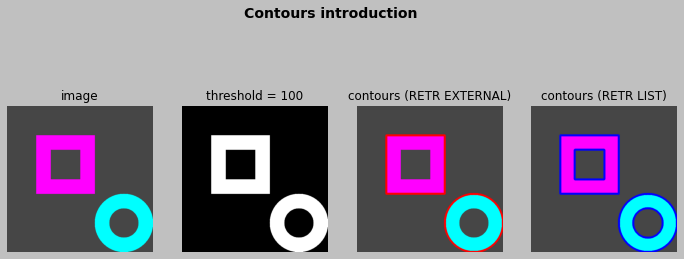

In [7]:
# Detecting and Drawing Contours in OpenCV

# Import required packages:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def draw_contour_outline(img, cnts, color, thickness=1):
    """Draws contours outlines of each contour"""
    for cnt in cnts:
        cv2.drawContours(img, [cnt], 0, color, thickness)

def build_sample_image():
    """Builds a sample image with basic shapes"""
    # Create a 500x500 gray image (70 intensity) with a rectangle and a circle inside:
    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 255), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)
    return img


def build_sample_image_2():
    """Builds a sample image with basic shapes"""
    # Create a 500x500 gray image (70 intensity) with a rectangle and a circle inside (with internal contours):
    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 255), -1)
    cv2.rectangle(img, (150, 150), (250, 250), (70, 70, 70), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)
    cv2.circle(img, (400, 400), 50, (70, 70, 70), -1)
    return img


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""
    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]     # w, h, 
    plt.subplot(1, 4, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("Contours introduction", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Load the image and convert it to grayscale:
image = build_sample_image_2()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply cv2.threshold() to get a binary image:
ret, thresh = cv2.threshold(gray_image, 70, 255, cv2.THRESH_BINARY)

# Find contours using the thresholded image:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
dst, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
dst, contours2, hierarchy2 = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

'''
[ cv2.findContours 설명 ]
- 입력값: cv2.findContours(src, mode, method, contours, hierarchy, offset)
    - src: 입력 영상, 검정과 흰색으로 구성된 바이너리 이미지
    - mode: 컨투어 제공 방식
        - cv2.RETR_EXTERNAL: 가장 바깥쪽 라인만 생성
        - cv2.RETR_LIST: 모든 라인을 계층 없이 생성
        - cv2.RET_CCOMP: 모든 라인을 2 계층으로 생성
        - cv2.RETR_TREE: 모든 라인의 모든 계층 정보를 트리 구조로 생성
        
    - method: 근사 값 방식
        - cv2.CHAIN_APPROX_NONE: 근사 없이 모든 좌표 제공,
        - cv2.CHAIN_APPROX_SIMPLE: 컨투어 꼭짓점 좌표만 제공,
        - cv2.CHAIN_APPROX_TC89_L1: Teh-Chin 알고리즘으로 좌표 개수 축소,
        - cv2.CHAIN_APPROX_TC89_KCOS: Teh-Chin 알고리즘으로 좌표 개수 축소)
    - contours(optional): 검출한 컨투어 좌표 (list type)
    - hierarchy(optional): 컨투어 계층 정보 (Next, Prev, FirstChild, Parent, -1 [해당 없음])
    - offset(optional): ROI 등으로 인해 이동한 컨투어 좌표의 오프셋
- 반환값: contours, hierarchy

'''

# Show the number of detected contours for each call:
print("detected contours (RETR_EXTERNAL): '{}' ".format(len(contours)))
print("detected contours (RETR_LIST): '{}' ".format(len(contours2)))

# Copy image to show the results:
image_contours = image.copy()
image_contours_2 = image.copy()

# Draw the outline of all detected contours:
draw_contour_outline(image_contours, contours, (0, 0, 255), 5)
draw_contour_outline(image_contours_2, contours2, (255, 0, 0), 5)

# Plot the images:
show_img_with_matplotlib(image, "image", 1)
show_img_with_matplotlib(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR), "threshold = 100", 2)
show_img_with_matplotlib(image_contours, "contours (RETR EXTERNAL)", 3)
show_img_with_matplotlib(image_contours_2, "contours (RETR LIST)", 4)

# Show the Figure:
plt.show()

In [8]:
dst

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [2]:
# Approximation methods in OpenCV contours (Compressing Contours in OpenCV)

# Import required packages:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def array_to_tuple(arr):
    """Converts array to tuple"""

    return tuple(arr.reshape(1, -1)[0])


def draw_contour_points(img, cnts, color):
    """Draw all points from a list of contours"""

    for cnt in cnts:
        print(cnt.shape)
        squeeze = np.squeeze(cnt)
        print(squeeze.shape)

        for p in squeeze:
            pp = array_to_tuple(p)
            cv2.circle(img, pp, 3, color, -1)

    return img


def build_sample_image():
    """Builds a sample image to search for contours"""

    # Create a 500x500 gray image (70 intensity) with a rectangle and a circle inside:
    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 255), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)

    return img


def build_sample_image_2():
    """Builds a sample image to search for contours"""

    # Create a 500x500 gray image (70 intensity) with a rectangle and a circle inside:
    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 255), -1)
    cv2.rectangle(img, (150, 150), (250, 250), (70, 70, 70), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)
    cv2.circle(img, (400, 400), 50, (70, 70, 70), -1)

    return img


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 8))
plt.suptitle("Contours approximation method", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Load the image and convert it to grayscale:
image = build_sample_image_2()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply cv2.threshold() to get a ginary image:
ret, thresh = cv2.threshold(gray_image, 70, 255, cv2.THRESH_BINARY)

# Create the different images to plot the detected contours:
image_approx_none = image.copy()
image_approx_simple = image.copy()
image_approx_tc89_l1 = image.copy()
image_approx_tc89_kcos = image.copy()

# Find contours using different methods:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours3, hierarchy3 = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_L1)
contours4, hierarchy4 = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)

# Draw the contours in the previously created images:
draw_contour_points(image_approx_none, contours, (255, 255, 255))
draw_contour_points(image_approx_simple, contours2, (255, 255, 255))
draw_contour_points(image_approx_tc89_l1, contours3, (255, 255, 255))
draw_contour_points(image_approx_tc89_kcos, contours4, (255, 255, 255))

# Plot all the figures:
show_img_with_matplotlib(image, "image", 1)
show_img_with_matplotlib(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR), "threshold = 100", 2)
show_img_with_matplotlib(image_approx_none, "contours (APPROX_NONE)", 3)
show_img_with_matplotlib(image_approx_simple, "contours (CHAIN_APPROX_SIMPLE)", 4)
show_img_with_matplotlib(image_approx_tc89_l1, "contours (APPROX_TC89_L1)", 5)
show_img_with_matplotlib(image_approx_tc89_kcos, "contours (APPROX_TC89_KCOS)", 6)

# Show the Figure:
plt.show()

ValueError: too many values to unpack (expected 2)

<Figure size 864x576 with 0 Axes>

'detected' contours: '1' 
moments calculated from the detected contour: {'m00': 235283.0, 'm10': 75282991.16666666, 'm01': 75279680.83333333, 'm20': 28496148988.333332, 'm11': 24089788592.25, 'm02': 28492341886.0, 'm30': 11939291123446.25, 'm21': 9118893653727.8, 'm12': 9117775940692.967, 'm03': 11936167227424.852, 'mu20': 4408013598.184406, 'mu11': 2712402.277420044, 'mu02': 4406324849.628765, 'mu30': 595042037.7265625, 'mu21': -292162222.4824219, 'mu12': -592577546.1586914, 'mu03': 294852334.5449219, 'nu20': 0.07962727021646843, 'nu11': 4.8997396280458296e-05, 'nu02': 0.07959676431294238, 'nu30': 2.2160077537124397e-05, 'nu21': -1.0880470778779139e-05, 'nu12': -2.2068296922023203e-05, 'nu03': 1.0980653771087236e-05}
Contour area: '235283.0'
Contour area: '235283.0'
center X : '320'
center Y : '320'
roundness: '1.023501338446455'
eccentricity: '0.03589342148758439'
eccentricity: '0.03434020681204824'
aspect ratio: '1.0'


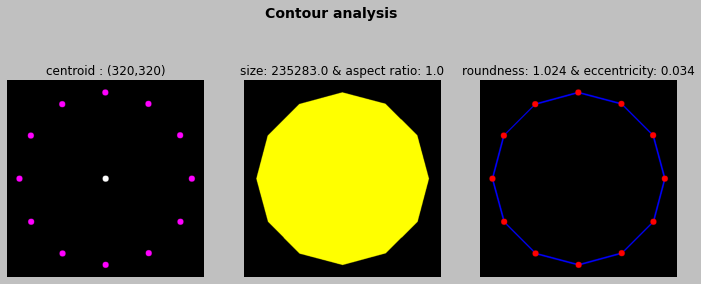

In [8]:
# Contour Analysis in OpenCV (Moments)!!!

# Import required packages:
import numpy as np
import cv2
from matplotlib import pyplot as plt


# the aspect ratio is defined as: width/height
def aspect_ratio(contour):
    """Returns the aspect ratio of the contour based on the dimensions of the bounding rect"""

    x, y, w, h = cv2.boundingRect(contour)
    res = float(w) / h
    return res


def roundness(contour, moments):
    """Calculates the roundness of a contour"""

    length = cv2.arcLength(contour, True)
    k = (length * length) / (moments['m00'] * 4 * np.pi)
    return k


def eccentricity_from_ellipse(contour):
    """Calculates the eccentricity fitting an ellipse from a contour"""

    (x, y), (MA, ma), angle = cv2.fitEllipse(contour)

    a = ma / 2
    b = MA / 2

    ecc = np.sqrt(a ** 2 - b ** 2) / a
    return ecc


def eccentricity_from_moments(moments):
    """Calculates the eccentricity from the moments of the contour"""

    a1 = (moments['mu20'] + moments['mu02']) / 2
    a2 = np.sqrt(4 * moments['mu11'] ** 2 + (moments['mu20'] - moments['mu02']) ** 2) / 2
    ecc = np.sqrt(1 - (a1 - a2) / (a1 + a2))
    return ecc


def get_one_contour():
    """Returns a 'fixed' contour"""

    cnts = [np.array(
        [[[600, 320]], [[563, 460]], [[460, 562]], [[320, 600]], [[180, 563]], [[78, 460]], [[40, 320]], [[77, 180]],
         [[179, 78]], [[319, 40]], [[459, 77]], [[562, 179]]], dtype=np.int32)]
    return cnts


def array_to_tuple(arr):
    """Converts array to tuple"""

    return tuple(arr.reshape(1, -1)[0])


def draw_contour_points(img, cnts, color):
    """Draw all points from a list of contours"""

    for cnt in cnts:
        # print(cnt.shape)
        squeeze = np.squeeze(cnt)
        # print(squeeze.shape)

        for p in squeeze:
            pp = array_to_tuple(p)
            cv2.circle(img, pp, 10, color, -1)

    return img


def draw_contour_outline(img, cnts, color, thickness=1):
    """Draws contours outlines of each contour"""

    for cnt in cnts:
        cv2.drawContours(img, [cnt], 0, color, thickness)


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    plt.subplot(1, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 5))
plt.suptitle("Contour analysis", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Create the canvas (black image with three channels):
canvas = np.zeros((640, 640, 3), dtype="uint8")

# Get a sample contours:
contours = get_one_contour()
print("'detected' contours: '{}' ".format(len(contours)))

# Create copy images to show the different results:
image_contour_points = canvas.copy()
image_contour_outline = canvas.copy()
image_contour_points_outline = canvas.copy()

# Draw only contour points:
draw_contour_points(image_contour_points, contours, (255, 0, 255))

# Draw only contour outline:
draw_contour_outline(image_contour_outline, contours, (0, 255, 255), -1)

# Draw both contour outline and points:
draw_contour_outline(image_contour_points_outline, contours, (255, 0, 0), 3)
draw_contour_points(image_contour_points_outline, contours, (0, 0, 255))

# Calculate image moments of the detected contour
M = cv2.moments(contours[0])
print("moments calculated from the detected contour: {}".format(M))

# 1) Calculate/show contour area using both cv2.contourArea() or m00 moment:
print("Contour area: '{}'".format(cv2.contourArea(contours[0])))
print("Contour area: '{}'".format(M['m00']))

# 2) Calculate centroid:
x_centroid = round(M['m10'] / M['m00'])
y_centroid = round(M['m01'] / M['m00'])
print("center X : '{}'".format(x_centroid))
print("center Y : '{}'".format(y_centroid))

# Draw circle based on the centroid coordinates:
cv2.circle(image_contour_points, (x_centroid, y_centroid), 10, (255, 255, 255), -1)

# 3) Calculate roundness (k):
# roundness (k) = (perimeter * perimeter) / (Area * 4 * PI):
# Therefore k for a circle is equal 1, for other objects > 1.
k = roundness(contours[0], M)
print("roundness: '{}'".format(k))

# 4) Calculate eccentricity using both provided formulas:
em = eccentricity_from_moments(M)
print("eccentricity: '{}'".format(em))
ee = eccentricity_from_ellipse(contours[0])
print("eccentricity: '{}'".format(ee))

# 5) Calculate the aspect ratio of the contour:
ar = aspect_ratio(contours[0])
print("aspect ratio: '{}'".format(ar))

# Plot the images:
show_img_with_matplotlib(image_contour_points, "centroid : (" + str(x_centroid) + "," + str(y_centroid) + ")", 1)
show_img_with_matplotlib(image_contour_outline, "size: " + str(M['m00']) + " & aspect ratio: " + str(ar), 2)
show_img_with_matplotlib(image_contour_points_outline,
                         "roundness: " + str(round(k, 3)) + " & eccentricity: " + str(round(ee, 3)), 3)

# Show the Figure:
plt.show()

ValueError: too many values to unpack (expected 2)

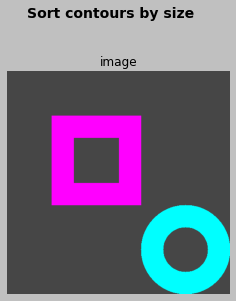

In [5]:
# Filtering Contours in OpenCV (Sort contours by size)

# Import required packages:
import cv2
from matplotlib import pyplot as plt


def get_position_to_draw(text, point, font_face, font_scale, thickness):
    """Gives the coordinates to draw centered"""

    text_size = cv2.getTextSize(text, font_face, font_scale, thickness)[0]
    text_x = point[0] - text_size[0] / 2
    text_y = point[1] + text_size[1] / 2
    return round(text_x), round(text_y)


def sort_contours_size(cnts):
    """Sort contours based on the size"""

    cnts_sizes = [cv2.contourArea(contour) for contour in cnts]
    (cnts_sizes, cnts) = zip(*sorted(zip(cnts_sizes, cnts)))
    return cnts_sizes, cnts


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    plt.subplot(2, 1, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(9, 9))
plt.suptitle("Sort contours by size", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Load the image and convert it to grayscale:
image = build_sample_image_2()
# image = cv2.imread("./shapes_sizes.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the image:
show_img_with_matplotlib(image, "image", 1)

# Apply cv2.threshold() to get a binary image
ret, thresh = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)

# Find contours using the thresholded image:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Show the number of detected contours:
print("detected contours: '{}' ".format(len(contours)))

# Sort the contours based on the size:
(contour_sizes, contours) = sort_contours_size(contours)

for i, (size, contour) in enumerate(zip(contour_sizes, contours)):
    # Compute the moment of contour:
    M = cv2.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:
    (x, y) = get_position_to_draw(str(i + 1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 2, 5)

    # Write the ordering of the shape on the center of shapes
    cv2.putText(image, str(i + 1), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 5)

# Plot the image
show_img_with_matplotlib(image, "result", 2)

# Show the Figure:
plt.show()

In [ ]:

"""
Contours shape recognition mainly based on cv2.approxPolyDP() function
"""
# Recognizing Contours in OpenCV

# Import required packages:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def get_position_to_draw(text, point, font_face, font_scale, thickness):
    """Gives the coordinates to draw centered"""

    text_size = cv2.getTextSize(text, font_face, font_scale, thickness)[0]
    text_x = point[0] - text_size[0] / 2
    text_y = point[1] + text_size[1] / 2
    return round(text_x), round(text_y)


def detect_shape(contour):
    """Returns the shape (e.g. 'triangle', 'square') from the contour"""

    detected_shape = '-----'

    # Calculate perimeter of the contour:
    perimeter = cv2.arcLength(contour, True)

    # Get a contour approximation:
    contour_approx = cv2.approxPolyDP(contour, 0.03 * perimeter, True)

    # Check if the number of vertices is 3. In this case, the contour is a triangle
    if len(contour_approx) == 3:
        detected_shape = 'triangle'

    # Check if the number of vertices is 4. In this case, the contour is a square/rectangle
    elif len(contour_approx) == 4:

        # We calculate the aspect ration from the bounding rect:
        x, y, width, height = cv2.boundingRect(contour_approx)
        aspect_ratio = float(width) / height

        # A square has an aspect ratio close to 1 (comparison chaining is used):
        if 0.90 < aspect_ratio < 1.10:
            detected_shape = "square"
        else:
            detected_shape = "rectangle"

    # Check if the number of vertices is 5. In this case, the contour is a pentagon
    elif len(contour_approx) == 5:
        detected_shape = "pentagon"

    # Check if the number of vertices is 6. In this case, the contour is a hexagon
    elif len(contour_approx) == 6:
        detected_shape = "hexagon"

    # The shape as more than 6 vertices. In this example, we assume that is a circle
    else:
        detected_shape = "circle"

    # return the name of the shape and the found vertices
    return detected_shape, contour_approx


def array_to_tuple(arr):
    """Converts array to tuple"""

    return tuple(arr.reshape(1, -1)[0])


def draw_contour_points(img, cnts, color):
    """Draw all points from a list of contours"""

    for cnt in cnts:
        print(cnt.shape)
        squeeze = np.squeeze(cnt)
        print(squeeze.shape)

        for p in squeeze:
            pp = array_to_tuple(p)
            cv2.circle(img, pp, 10, color, -1)

    return img


def draw_contour_outline(img, cnts, color, thickness=1):
    """Draws contours outlines of each contour"""

    for cnt in cnts:
        cv2.drawContours(img, [cnt], 0, color, thickness)


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    plt.subplot(2, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(12, 9))
plt.suptitle("Shape recognition based on cv2.approxPolyDP()", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Load the image and convert it to grayscale:
# image = build_sample_image_2()
image = cv2.imread("F:/shapes.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply cv2.threshold() to get a binary image:
ret, thresh = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)

# Find contours using the thresholded image:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Show the number of detected contours:
print("detected contours: '{}' ".format(len(contours)))

# Make a copy to draw the results:
image_contours = image.copy()
image_recognition_shapes = image.copy()

# Draw the outline of all detected contours:
draw_contour_outline(image_contours, contours, (255, 255, 255), 4)

for contour in contours:
    # Compute the moments of the current contour:
    M = cv2.moments(contour)

    # Calculate the centroid of the contour from the moments:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Detect shape of the current contour:
    shape, vertices = detect_shape(contour)

    # Draw the detected vertices:
    draw_contour_points(image_contours, [vertices], (255, 255, 255))

    # Get the position to draw:
    (x, y) = get_position_to_draw(shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.6, 3)

    # Write the name of shape on the center of shapes
    cv2.putText(image_recognition_shapes, shape, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (255, 255, 255), 3)

# Plot the images
show_img_with_matplotlib(image, "image", 1)
show_img_with_matplotlib(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR), "threshold = 100", 2)
show_img_with_matplotlib(image_contours, "contours outline (after approximation)", 3)
show_img_with_matplotlib(image_recognition_shapes, "contours recognition", 4)

# Show the Figure:
plt.show()
